In [2]:
import spacy
import requests
import pandas as pd
from spacy.lang.en.examples import sentences
from spacy import displacy
import matplotlib.pyplot as plt

In [3]:
# Load the spacy model
nlp = spacy.load('en_core_web_md')

In [4]:
text = "I work as a software engineer for Goldman Sachs in New York City."
displacy.render(nlp(text), style='ent', jupyter=True)

## 1) Anaylzing Positive vs. Negative Features

In [5]:
# read xlsx file as a df
df = pd.read_excel('../data/BookingDotCom_HotelReviews.xlsx')
df.head()

,Hotel_Name,Hotel_Address,Review_Count,Non_Review_Scoring_Count,Average_Hotel_Score,Review_Date,Reviewer_Nationality,Positive_Comments,Negative_Comments,Total_Reviewer_Reviews,Reviewer_Score,Tags
0,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Russia,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Ireland,No real complaints the hotel was great great ...,No Negative,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,Australia,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,9,7.1,"[' Leisure trip ', ' Family with young childre..."
3,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,United Kingdom,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex..."
4,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-24,New Zealand,Amazing location and building Romantic setting,You When I booked with your company on line y...,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St..."


In [6]:
# normalise the columns, make everything lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['hotel_name', 'hotel_address', 'review_count',
       'non_review_scoring_count', 'average_hotel_score', 'review_date',
       'reviewer_nationality', 'positive_comments', 'negative_comments',
       'total_reviewer_reviews', 'reviewer_score', 'tags'],
      dtype='object')

In [7]:
# make 2 new df's, one for positive reviews and one for negative reviews
df_pos = df[df['reviewer_score'] > 7]
df_neg = df[df['reviewer_score'] < 4]
df_pos.head()

,hotel_name,hotel_address,review_count,non_review_scoring_count,average_hotel_score,review_date,reviewer_nationality,positive_comments,negative_comments,total_reviewer_reviews,reviewer_score,tags
1,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-08-03,Ireland,No real complaints the hotel was great great ...,No Negative,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
2,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-31,Australia,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,9,7.1,"[' Leisure trip ', ' Family with young childre..."
7,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-17,United Kingdom,Good location Set in a lovely park friendly s...,Apart from the price for the brekfast Everyth...,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double..."
9,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-08,Norway,The room was big enough and the bed is good T...,The aircondition makes so much noise and its ...,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro..."
10,Hotel Arena,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,1403,194,7.7,2017-07-07,United Kingdom,Rooms were stunningly decorated and really sp...,Nothing all great,2,10.0,"[' Leisure trip ', ' Group ', ' Duplex Double ..."


In [13]:
print(df_pos.shape, df_neg.shape)

(428476, 12) (10728, 12)


In [14]:
# Sample 100 reviews from each df
df_pos_sample = df_pos.sample(n=1000)
df_neg_sample = df_neg.sample(n=1000)

In [15]:
positive_features = dict()
# iterate through the positive reviews and extract the features from column positive_comments
for index, row in df_pos_sample.iterrows():
    positive = row['positive_comments']
    doc = nlp(positive)
    # if pos is noun, or adjective add it to the dictionary
    for token in doc:
        # if token.pos_ == 'NOUN' or token.pos_ == 'ADJ':
        if token.pos_ == 'ADJ':
            if token.text in positive_features:
                positive_features[token.text] += 1
            else:
                positive_features[token.text] = 1

# sort the dictionary by the values
positive_sorted = sorted(positive_features.items(), key=lambda x: x[1], reverse=True)
positive_sorted

[('friendly', 175),
 ('good', 159),
 ('helpful', 152),
 ('comfortable', 144),
 ('great', 143),
 ('clean', 125),
 ('nice', 115),
 ('excellent', 83),
 ('Great', 75),
 ('Good', 64),
 ('lovely', 53),
 ('comfy', 51),
 ('quiet', 43),
 ('Excellent', 42),
 ('Positive', 39),
 ('amazing', 39),
 ('perfect', 39),
 ('modern', 36),
 ('Friendly', 32),
 ('Comfortable', 29),
 ('little', 26),
 ('small', 26),
 ('free', 25),
 ('spacious', 25),
 ('Lovely', 24),
 ('close', 24),
 ('large', 23),
 ('Nice', 22),
 ('beautiful', 21),
 ('central', 21),
 ('big', 21),
 ('fantastic', 21),
 ('best', 21),
 ('easy', 19),
 ('Clean', 18),
 ('pleasant', 17),
 ('wonderful', 16),
 ('convenient', 16),
 ('professional', 16),
 ('available', 15),
 ('polite', 15),
 ('fresh', 15),
 ('delicious', 14),
 ('many', 14),
 ('extra', 12),
 ('public', 12),
 ('old', 12),
 ('main', 12),
 ('attentive', 11),
 ('warm', 11),
 ('Fantastic', 11),
 ('more', 10),
 ('kind', 10),
 ('new', 10),
 ('next', 10),
 ('first', 9),
 ('top', 9),
 ('other', 9),


In [16]:
negative_features = dict()
# iterate through the positive reviews and extract the features from column positive_comments
for index, row in df_neg_sample.iterrows():
    negative = row['negative_comments']
    doc = nlp(negative)
    # if pos is noun, or adjective add it to the dictionary
    for token in doc:
        # if token.pos_ == 'NOUN' or token.pos_ == 'ADJ':
        if token.pos_ == 'ADJ':
            if token.text in negative_features:
                negative_features[token.text] += 1
            else:
                negative_features[token.text] = 1

# sort the dictionary by the values
negative_sorted = sorted(negative_features.items(),
                         key=lambda x: x[1], reverse=True)
negative_sorted


[('small', 144),
 ('old', 106),
 ('bad', 100),
 ('poor', 97),
 ('dirty', 91),
 ('good', 77),
 ('rude', 77),
 ('noisy', 64),
 ('clean', 60),
 ('other', 59),
 ('cold', 46),
 ('same', 41),
 ('hot', 40),
 ('better', 40),
 ('helpful', 37),
 ('available', 36),
 ('more', 36),
 ('next', 36),
 ('awful', 35),
 ('double', 34),
 ('expensive', 34),
 ('tiny', 33),
 ('full', 32),
 ('worst', 32),
 ('whole', 32),
 ('extra', 31),
 ('terrible', 30),
 ('uncomfortable', 26),
 ('front', 26),
 ('worth', 24),
 ('slow', 24),
 ('first', 23),
 ('unhelpful', 22),
 ('free', 21),
 ('little', 21),
 ('Dirty', 21),
 ('last', 20),
 ('single', 20),
 ('nice', 20),
 ('friendly', 19),
 ('disappointed', 19),
 ('many', 19),
 ('tired', 19),
 ('different', 19),
 ('horrible', 18),
 ('long', 18),
 ('few', 18),
 ('second', 17),
 ('much', 17),
 ('hard', 17),
 ('big', 17),
 ('sure', 16),
 ('Poor', 16),
 ('such', 16),
 ('disgusting', 15),
 ('smaller', 15),
 ('thin', 14),
 ('high', 14),
 ('new', 14),
 ('dark', 14),
 ('unfriendly', 14

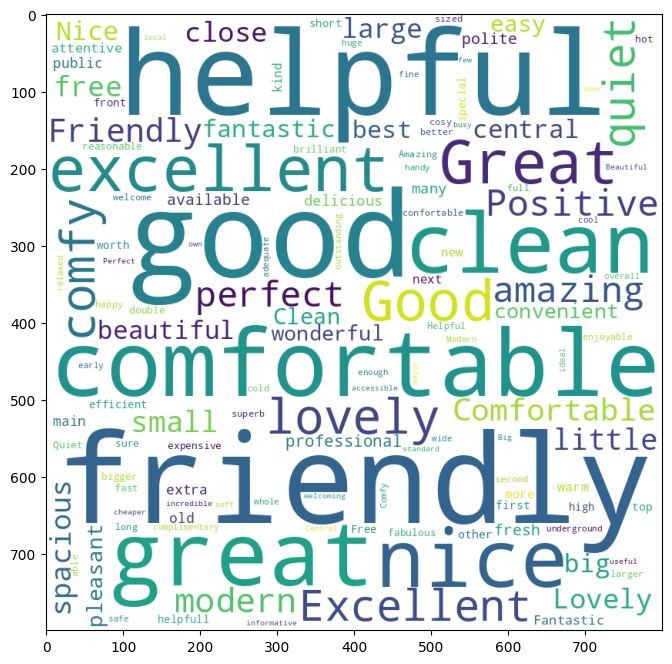

In [18]:
# make word cloud with positive features and negative features
from wordcloud import WordCloud

# make a word cloud for positive features
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(positive_features)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)

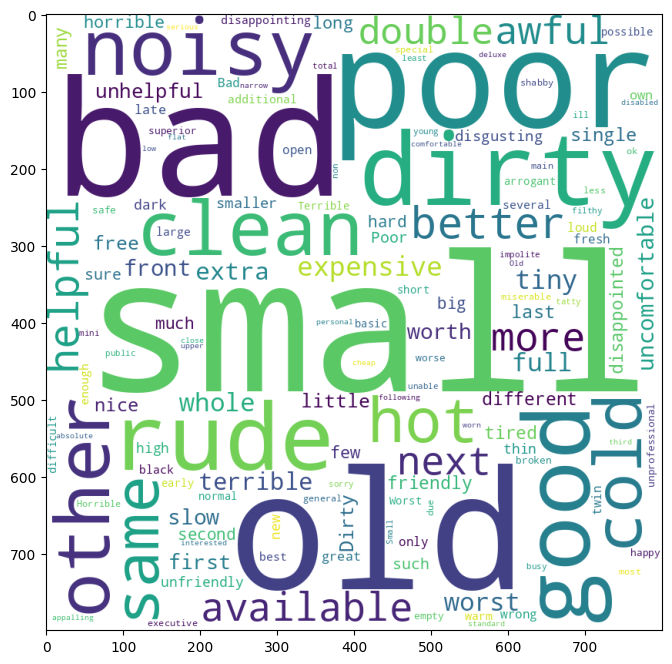

In [19]:
# make a word cloud for positive features
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      min_font_size=10).generate_from_frequencies(negative_features)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)


## 2) What are the top five features that customers prefer most if they are a solo traveler vs traveling with a group vs on a business trip vs a leisure trip vs traveling as a couple vs a family with young children. You will find these categories in the "Tags" column. There are a few more tags that we don't need. (2 points).